# Κώδικας
Αρχικά κάνουμε εισαγωγή των βιβλιοθηκών που θα χρησιμοποιήσουμε

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
import pandas as pd

Στη συνέχεια εισάγουμε το dataset που θα χρησιμοποιήσουμε ως ένα Pandas DataFrame και το ελέγχουμε συνοπτικά.

In [9]:
data = pd.read_csv(r'C:\Users\user\Desktop\datasets\dokimastika\data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Θα κρατήσουμε ως labels των κατηγοριών μας το χαρακτηριστικό 'diagnosis' και τα features 2-31 θα χρησιμοποιηθούν ως δεδομένα ανάλυσης.

Αρχικά για να έχουμε μια πρώτη εικόνα του δείγματός μας, θα φτιάξουμε ένα pie chart που θα μας δείχνει την κατανωμή των κατηγοριών.

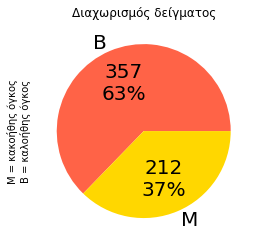

In [25]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

data.groupby('diagnosis').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'])
plt.title('Διαχωρισμός δείγματος')
plt.ylabel('Μ = κακοήθης όγκος\nΒ = καλοήθης όγκος')
plt.show()

Παρατηρούμε λοιπόν ότι στο δείγμα μας έχου 37% κακοήθεις όγκους (M = Maligant) και 63% καλοήθεις (B = Benign).

Έπειτα διαχωρίζουμε τα δεδομένα που θα χρησιμοποιήσουμε X (τροποποιώντας τα σε numpy arrays) σε σχέση με τους κατηγοριοποιητές Y και μετασχηματίζουμε τα labels των κατηγοριών τοποθετώντας 1 στα labels των κακοήθων όγκων και 0 στα labels των καλοήθων όγκων.

In [29]:
new_data = data.to_numpy()
X = new_data[:, 3:31]
Y = new_data[:,1]
for i in range(len(Y)):
    if Y[i] == 'M':
        Y[i]=1
    else:
        Y[i] = 0

Y = list(Y)

Στη μελέτη μας η οποία αποσκοπεί στη σύγκριση των διαφόρων μεθόδων επιλογής χαρακτηριστικών, θα χρησιμοποιήσουμε ως classifiers δέντρα αποφάσεων και Naive Bayes. Όσον αφορά τα δέντρα αποφάσεων, για να υπάρχει ποικιλία, θα χρησιμοποιηθεί ο CRASP αλγόριθμος για τη δημιουργία τους, ενώ θα έχουμε 